# Example solution to Practice Problem 2

How sensitive are t-tests, really, to the underlying distribution of data? People will often choose the Wilcoxon signed rank test or rank-sum test to test hypotheses when their underlying data are not normally distributed, despite the fact that these tests are much more limited in power and are useless in assessing effect sizes. For your practice this week, pick a distribution that is not normal and generate distributions of the experimental t-statistic resulting from random sampling from your distribution over a range of degrees of freedom, as we did in the in-class tutorial. But take this analysis one step further: Compute the Kolmogorov-Smirnov statistic for each degree of freedom. At which sample size (if any) does is your experimental t distribution become statistically indistinguishable from the Student’s t distribution?

In [1]:
# Import numerical tools
import numpy as np

# Import statistical tools
from scipy import stats
np.random.seed(12345678) #If you specify a random seed, it will initialize the random number
    #generator the same way each time, making your results reproducible each time you rerun
    #the code. Note that multiple draws of a random number within the same session will still 
    #return different values.

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

%config InlineBackend.figure_formats = {'svg',}
#%config InlineBackend.figure_formats = {'png', 'retina'}

#Import pandas for reading in and managing data
import pandas as pd

#Import seaborn (useful for plotting - makes plots pretty)
import seaborn as sns

## A modified copied-and-pasted code from the tutorial on hypothesis testing


...Updated with use of the exponential distribution and the calculation of Kolmogorov-Smirnov statistics

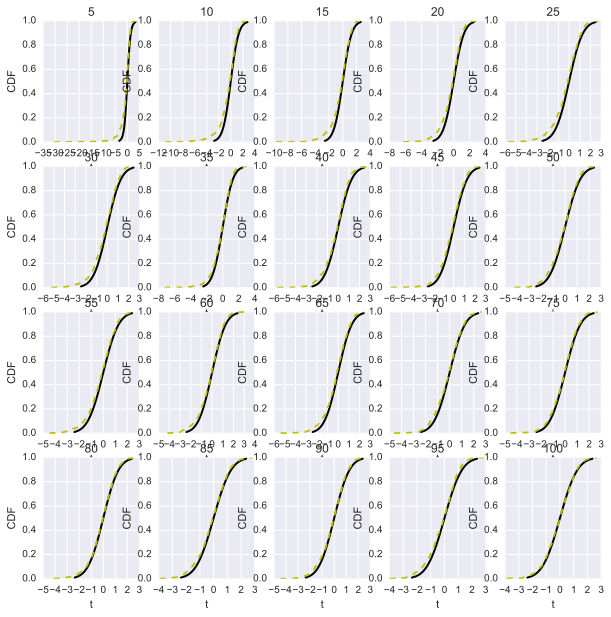

[[  1.38295893e-01   0.00000000e+00]
 [  1.02771470e-01   1.19552768e-09]
 [  8.40915491e-02   1.33715840e-06]
 [  7.94622290e-02   6.12346117e-06]
 [  7.71559242e-02   1.26531938e-05]
 [  7.33572843e-02   3.99082876e-05]
 [  4.63482970e-02   2.63787699e-02]
 [  5.09388466e-02   1.07568788e-02]
 [  5.60319586e-02   3.60154793e-03]
 [  4.44954183e-02   3.69910569e-02]
 [  5.46987656e-02   4.84449661e-03]
 [  4.61940420e-02   2.71461067e-02]
 [  5.11681659e-02   1.02627213e-02]
 [  5.41964924e-02   5.40697354e-03]
 [  3.66047750e-02   1.33816603e-01]
 [  3.24168258e-02   2.39262616e-01]
 [  4.60541128e-02   2.78591712e-02]
 [  4.23619520e-02   5.36748328e-02]
 [  5.03987329e-02   1.20068192e-02]
 [  2.89433157e-02   3.67320073e-01]]


In [4]:
ntrials = 1000 # This is the number of times we will draw arrays of random numbers for each
# degree of freedom evaluated.
max_df = 100 # Maximum degrees of freedom tested.

pctiles = np.arange(0.01, 1.0, 0.01) #The array of cumulative probabilities for the student's t
# distribution that we would like to plot. 

fig = plt.figure(figsize=(10,10)) # This initializes a new figure window and calls it 'fig'. The
    # size given is in inches.
    
ks_results = np.zeros((int(max_df/5), 2)) # Initialize the matrix where we will store the results

for df in range(5,max_df+1,5): # Loop over the degrees of freedom. Note how this for loop is called.
    # The colon is essential! The indent beneath specifies everything that is run as part of the
    # for loop. 
    # Comprehension check: What numbers does i include? How would you test this?
       
    X = np.random.exponential(1,(df+1, ntrials)) #Generates a matrix of exponential random numbers, representing
    # n trials of random draws, each with sample size df + 1. Here the expected value is 1.
    
    X_mean = np.mean(X, 0) #Finds the mean of the numbers drawn from the distribution down the rows
    # (i.e., axis 0)
    
    X_std_err = np.std(X,0)/np.sqrt(df+1) #Finds the standard error of the mean
    
    X_t = (X_mean-1)/X_std_err # The t-statistic for the mean. (In other words, how far the mean is 
        # from the expected value relative to the standard error, where here, the expected value
        # is one)
    
    X_sort = np.sort(X_t) # Sorts X_mean from low to high
    
    cum_prob = np.arange(1,len(X_sort)+1)/len(X_sort) #The cumulative probability value (i.e., 
                # percentile) associated with each value in X_sort. 
    
    actual_t = stats.t.ppf(pctiles, df) # The actual cumulative probability of the t distribution
    # for each percentile defined above.
        
    ax = fig.add_subplot(4, 5, int(df/5)) # Makes subplot number 'df' in a 4 x 5 array of subplots
    ax.plot(actual_t, pctiles, 'k-', linewidth=2)
    #print(X_t)
    #print(cum_prob)
    ax.plot(X_sort, cum_prob, 'y--')
    ax.set_xlabel('t') #In other words, deviation from expected value, which is 0 here
    ax.set_ylabel('CDF')
    ax.set_title(df)
    ks_results[int(df/5)-1, :] = stats.kstest(X_t, 't', args = (df,))
    
plt.show() #This is outside the for loop, because it returns to the original indentation (or lack
    # thereof)
print(ks_results)

So here, when the sample size is around 75, violation of the assumption of normality does not make much of a difference.